# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Siti Arfah Hamidah
- **Email:** sitiarfahhamidahh@gmail.com
- **ID Dicoding:** Siti Arfah Hamidah

## Menentukan Pertanyaan Bisnis

- Berapa persentase penyewaan yang berasal dari pengguna terdaftar dibandingkan dengan pengguna kasual?
- Jam berapa penyewaan sepeda paling tinggi?
- Bagaimana pengaruh season terhadap penyewaan sepeda baik penyewa registered ataupun penyewa casual?

## Import Semua Packages/Library yang Digunakan

In [229]:
# mengimport berbagai library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [230]:
# memuat data dari tabel day.csv
day_df = pd.read_csv("bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [231]:
# Memuat data dari tabel hour.csv
hour_df = pd.read_csv("bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- sekarang kita telah berhasil memuat semua data yang dibutuhkan. Tahap selanjutnya ialah menilai kualitas dari data tersebut.

### Assessing Data

Assesing data day_df

In [232]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [233]:
# menampilkan informasi terkait jumlah missing values
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [234]:
# Memeriksa duplikasi data pada day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [235]:
# memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [236]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [237]:
# menampilkan informasi terkait jumlah missing values
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [238]:
# Memeriksa duplikasi data pada hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [239]:
# memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada tabel day_df ataupun hour_df, tipe data dteday adalah object sehingga sebaiknya di konversi menjadi datetime agar memudahkan dalam analisis
- Pada tabel day_df ataupun hour_df, kolom season, weathersit, yr, dan mnth tipe data nya int sehingga sebaiknya diubah menjadi category
- Untuk memudahkan, kolom season, weathersit, yr, dan mnth,  

### Cleaning Data

In [240]:
# konversi tipe data dteday dari object ke datetime untuk memudahkan analisis data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# kolom season, weathersit, yr, dan mnth tipe data nya diubah dari int ke category
day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')

In [241]:
# konversi tipe data dteday dari object ke datetime untuk memudahkan analisis data
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# kolom season, weathersit, yr, dan mnth tipe data nya diubah dari int ke category
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')

In [242]:
# mengkonversi isi kolom season
day_df['season'] = day_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

In [243]:
# mengkonversi isi kolom weathersit
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
})


In [244]:
# Mengkonversi isi kolom mnth
day_df['mnth'] = day_df['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})


In [245]:
#Mengkonversi isi kolom weekday
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

In [246]:
#Mengkonversi isi kolom holiday, workingday
day_df['holiday'] = day_df['holiday'].map({0: 'No', 1: 'Yes'})
day_df['workingday'] = day_df['workingday'].map({0: 'No', 1: 'Yes'})

In [247]:
#Mengkonversi isi kolom yr
day_df['yr'] = day_df['yr'].map({
    0: '2011',
    1: '2012'
})

In [248]:
# Memuat data day_df setelah di cleaning
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No,Saturday,No,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,No,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Yes,"Clear, Few clouds",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Yes,"Clear, Few clouds",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Yes,"Clear, Few clouds",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [249]:
# Konversi isi kolom season pada hour_df
hour_df['season'] = hour_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

In [250]:
# Konversi isi kolom weathersit pada hour_df
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear, Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
})


In [251]:
# Konversi isi kolom mnth pada hour_df
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

In [252]:
# Konversi isi kolom weekday pada hour_df
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

In [253]:
# Konversi isi kolom holiday, workingday pada hour_df
hour_df['holiday'] = hour_df['holiday'].map({0: 'No', 1: 'Yes'})
hour_df['workingday'] = hour_df['workingday'].map({0: 'No', 1: 'Yes'})

In [254]:
# Konversi isi kolom yr pada hour_df
hour_df['yr'] = hour_df['yr'].map({
    0: '2011',
    1: '2012'
})

In [255]:
# Memuat isi data hour_df setelah di cleaning
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,No,Saturday,No,"Clear, Few clouds",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No,Saturday,No,"Clear, Few clouds",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No,Saturday,No,"Clear, Few clouds",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No,Saturday,No,"Clear, Few clouds",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No,Saturday,No,"Clear, Few clouds",0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Setelah proses cleaning data menjadi lebih mudah dibaca dan dipahami
- Data menjadi lebih mudah untuk digunakan pada tahap selanjutnya yaitu tahap Exploratory Data Analysis (EDA)

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [256]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,No,Saturday,Yes,"Clear, Few clouds",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 17.379. Rata-rata penyewaan per jam adalah 189,46, dan Standar deviasi penyewaan adalah 181,39,

In [257]:
# melihat persebaran jumlah pelanggan berdasarkan hour/jam
hour_df.groupby(by="hr").cnt.sum()

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Berdasarkan hasil di atas, dapat dilihat bahwa Pelanggan paling banyak yaitu pada jam 17 dan paling sedikit pada jam 04

**Explore data_df**

In [258]:
# melihat parameter statistik pada day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,No,Saturday,Yes,"Clear, Few clouds",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [259]:
 # lihat demografi pelanggan berdasarkan season
day_df.groupby(by="season").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

<ipython-input-259-c59b5cf66841>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


,registered,casual
,sum,sum
season,,
Spring,410726,60622
Summer,715067,203522
Fall,835038,226091
Winter,711831,129782


Berdasarkan hasil di atas, Dapat disimpulkan bahwa para penyewa sepeda paling banyak pada musim gugur dan paling sedikit pada musim spring/semi

In [260]:
day_df.groupby(by="yr").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

<ipython-input-260-922d0476e435>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="yr").agg({


,registered,casual
,sum,sum
yr,,
2011,995851,247252
2012,1676811,372765


Berdasarkan data di atas, dapat disimpulkan bahwa terdapat peningkatan penyewa sepeda dari tahun 2011 ke 2012 baik penyewa yang registered ataupun casual. Serta Pengguna terdaftar lebih banyak dari pada pengguna casual

**Insight:**
- pengguna terdaftar persentasenya lebih besar daripada pengguna kasual
- Penyewaan sepeda paling tinggi pada jam 17 dan paling sedikit pada jam 04
-  para penyewa sepeda paling banyak pada musim gugur dan paling sedikit pada musim spring/semi
- terdapat peningkatan penyewa sepeda dari tahun 2011 ke 2012 baik penyewa yang registered ataupun casual

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa persentase penyewaan yang berasal dari pengguna terdaftar dibandingkan dengan pengguna kasual?


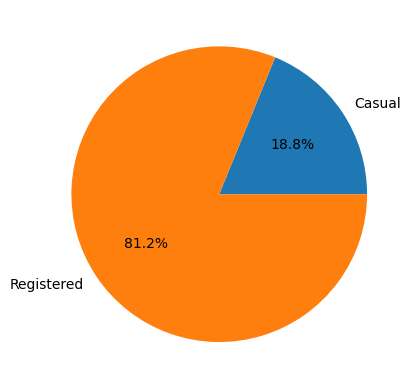

In [261]:
# menghitung jumlah pendafatar Kasual
casual_counts = sum(day_df['casual'])

#Menghitung Jumlah pendaftar terdaftar
registered_counts = sum(day_df['registered'])

# mendefinisikan data untuk pie pilot
data = [casual_counts, registered_counts]
labels = ["Casual", "Registered"]

#membuat Pie Pilot untuk menggambarkan perbandingan antara persentase penyewa casual da registered
plt.pie(data, labels=labels, autopct='%1.1f%%')

# Menampilkan pie pilot
plt.show()


Berdasarkan gaambar di atas, Penyewaan yang berasal dari penyewa terdaftar adalah 81,2% dan penyewa casual adalah 18,8%

### Pertanyaan 2: Jam berapa penyewaan sepeda paling tinggi?

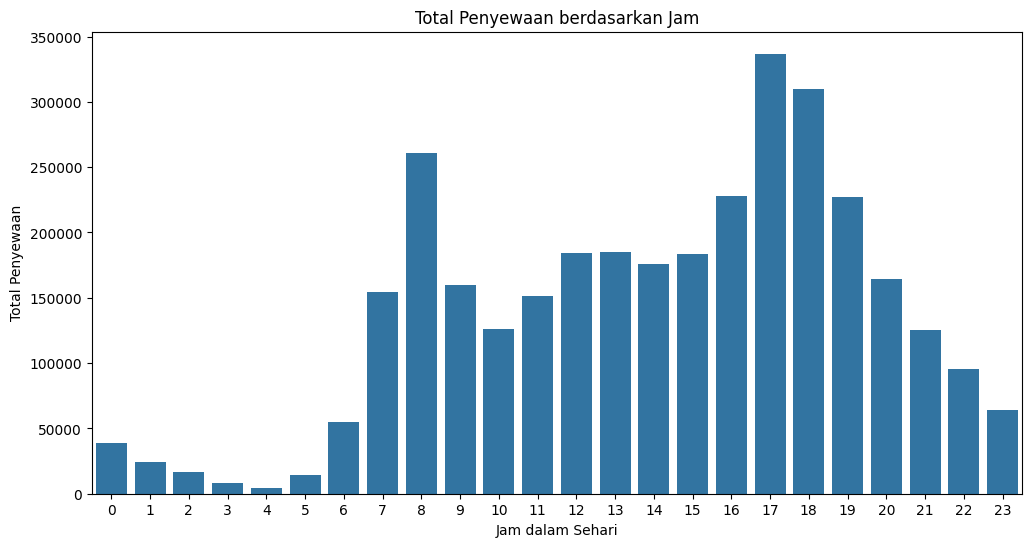

In [262]:
hour_counts = hour_df.groupby('hr')['cnt'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Total Penyewaan berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.show()

Berdasarkan gambar di atas, Penyewaan sepeda paling tinggi yaitu pada jam 17.00 dan paling sedikit pada jam 04.00

### Pertanyaan 3: Bagaimana pengaruh season terhadap penyewaan sepeda baik penyewa registered ataupun penyewa casual?

<ipython-input-263-ad0f1ce24b14>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal=day_df.groupby("season")[["registered", "casual"]].sum().reset_index()


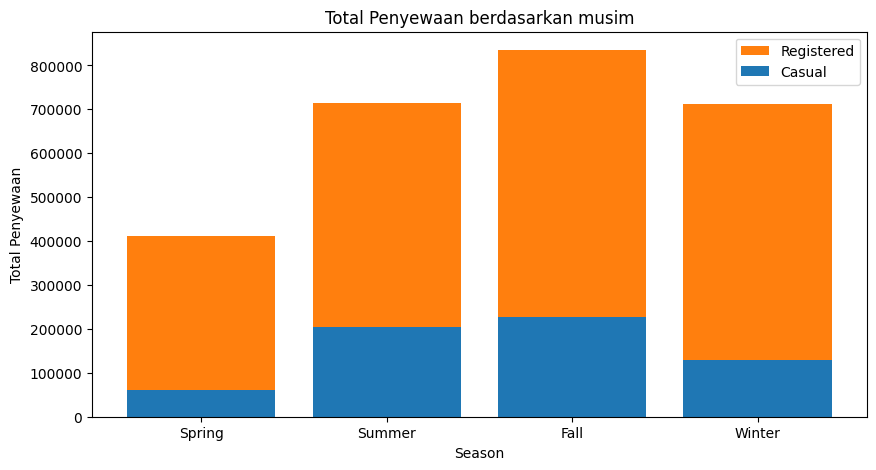

In [263]:
# Memngelompokkan data berdasarkan seasonnya dan registered atau casualnya
seasonal=day_df.groupby("season")[["registered", "casual"]].sum().reset_index()

plt.figure(figsize=(10, 5))

# Membuat plt bar
plt.bar (
    seasonal["season"],
    seasonal["registered"],
    label="Registered",
    color="tab:orange"
)

plt.bar (
    seasonal["season"],
    seasonal["casual"],
    label="Casual",
    color="tab:blue"
)

plt.title('Total Penyewaan berdasarkan musim')
plt.xlabel('Season')
plt.ylabel('Total Penyewaan')
plt.legend()
plt.show()

Berdasarkan gambar di atas, terlihat bahwa season berpengaruh terhadap jumlah penyewa. Penyewa paling banyak yaitu pada musim gugur(fall), lalu pada musim panas(summer), musim dingin (winter), dan paling sedikit pada musim semi (spring

**Insight:**
- Penyewaan yang berasal dari penyewa terdaftar adalah 81,2% dan penyewa casual adalah 18,8%
-  Penyewaan sepeda paling tinggi yaitu pada jam 17.00 dan paling sedikit pada jam 04.00
- season berpengaruh terhadap jumlah penyewa. Penyewa paling banyak yaitu pada musim gugur(fall), lalu pada musim panas(summer), musim dingin (winter), dan paling sedikit pada musim semi (spring

## Analisis Lanjutan (Opsional)

**1. Analisis Clustering**




disini saya akan melakukan analisis untuk mencari total pengguna berdasarkan keadaan cuaca

In [264]:
hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False).reset_index()

<ipython-input-264-daf8456bad2a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False).reset_index()


,weathersit,cnt
0,"Clear, Few clouds",848
1,Mist + Cloudy,649
2,Light Rain/Snow,368
3,Heavy Rain/Snow,3


Berdasarkan gambar di atas, pengguna lebih banyak menggunakan sepeda pada cuaca yang clear, few clouds

disini saya akan melakukan analisis untuk mencari total pengguna berdasarkan hari

In [265]:
hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False).reset_index()

,weekday,cnt
0,Wednesday,616
1,Saturday,609
2,Thursday,606
3,Tuesday,598
4,Monday,595
5,Friday,584
6,Sunday,571


Berdasarkan gambar di atas, pengguna lebih banyak menggunakan sepeda pada hari Rabu, lalu sabtu, Kamis, Selasa, Senin, Jum'at, dan paling sedikit Minggu

## Conclusion

- Conclution pertanyaan 1: Berdasarkan gaambar di atas, Penyewa yang paling banyak adalah penyewa terdaftar(registered) dengan persentase 81,2% sedangkan penyewa casual hanya 18,8%
- Conclution pertanyaan 2: Berdasarkan gambar di atas dapat dilihat bahwa Penyewaan sepeda paling tinggi yaitu pada jam 17.00 dan paling sedikit pada jam 04.00
- Conclution pertanyaan 3: Berdasarkan gambar di atas dapat terlihat bahwa season berpengaruh terhadap jumlah penyewa baik yang registered maupun casual. Penyewa paling banyak yaitu pada musim gugur(fall), lalu pada musim panas(summer), musim dingin (winter), dan paling sedikit pada musim semi (spring)